In [74]:
import pandas as pd
import numpy as np

In [75]:
train1=pd.read_csv(r'C:\Users\79375\Desktop\DS\Titinic\train.csv')
test1=pd.read_csv(r'C:\Users\79375\Desktop\DS\Titinic\test.csv')

In [76]:
train=pd.concat([train1,test1])

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
# train.info()
train.describe(include='O')
# train.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [80]:
train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [81]:
train[['Pclass','Survived']].groupby('Pclass').mean()
# процент вживаемости в зависимости от класса пасажира

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [82]:
# Заполняет все пропущеные значения "Embarked (Место погружения)" на "S"
train['Embarked']=train['Embarked'].fillna('S')
# Показываем вероятность выживаемости в зависимости от места погружения
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [83]:
train[['Sex','Survived']].groupby(['Sex'],).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [84]:
# Объединяет две колонки "Parch" и "SibSp" в одну которая обозначает количество родствеников на борту
train['FamilySize']=train['Parch']+train['SibSp']
# Делает разделение был чловек один на бортуили с родствениками
train['Alone']=train['FamilySize']==0
# Показывает процент выживаемости одного(True) человека и нескольких 
train[['Alone','Survived']].groupby(['Alone']).mean()

,Survived
Alone,
False,0.505650
True,0.303538


In [85]:
# Заполняем все пропущеные ячейки "Fare" медианой этой колонки
train['Fare']=train['Fare'].fillna(train['Fare'].median())
# разбиваем на 4 персантиля по цене билетов
train['CategoricalFare']=pd.qcut(train['Fare'],4,precision=0)
# показываем выживаемость в соотношении к количеству денег отданных за путешествие
train[['CategoricalFare','Survived']].groupby(['CategoricalFare'],).mean().sort_values(by='CategoricalFare')

,Survived
CategoricalFare,
"(-1.0, 8.0]",0.197309
"(8.0, 14.0]",0.303571
"(14.0, 31.0]",0.441048
"(31.0, 512.0]",0.600000


In [86]:
# средний возраст
age_mean=train['Age'].mean()
# Среднее откланение возраста
age_std=train['Age'].std()
# записывает количество пропущеных ячеек
null_values_count=train['Age'].isnull().count()
# записывает вектор из рандомных возрастов в диапазоне от (возраст- среднее откланение) до (возраст- среднее откланение)
# размером в количество пропущеных ячеек
age_null_random_list=np.random.randint(age_mean-age_std,age_mean+age_std, size=null_values_count)



# заполняем вектор из пустых ячеек возраста рандомными значениями
train['Age'][np.isnan(train['Age'])]=age_null_random_list
# разделяет весь вектор возрастов на 5 диапазонов
train['CategoricalAge']=pd.cut(train['Age'],5,precision=0)
# группируем и показываем процент выживаемости в разных возрастных группах
train[['CategoricalAge','Survived']].groupby(['CategoricalAge'],).mean().sort_values(by='CategoricalAge')

<ipython-input-86-596a2692c889>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])]=age_null_random_list


,Survived
CategoricalAge,
"(0.1, 16.0]",0.526786
"(16.0, 32.0]",0.361556
"(32.0, 48.0]",0.358779
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [87]:
# Функция выбирающая правое значение интервала
def rightValue(interval):
    return interval.right
# Применяем функцию к колонке "CategoricalAge"
train['CategoricalAge']=train['CategoricalAge'].apply(rightValue)
# Применяем функцию к колонке "CategoricalFare"
train['CategoricalFare']=train['CategoricalFare'].apply(rightValue)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,8.0,32.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,512.0,48.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,14.0,32.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,512.0,48.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,14.0,48.0


In [88]:
drop_elemente=['PassengerId','Name','Ticket','Cabin','SibSp','Parch','FamilySize','Age']
train = train.drop(drop_elemente, axis=1)

In [89]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Alone,CategoricalFare,CategoricalAge
0,0.0,3,male,7.2500,S,False,8.0,32.0
1,1.0,1,female,71.2833,C,False,512.0,48.0
2,1.0,3,female,7.9250,S,True,14.0,32.0
3,1.0,1,female,53.1000,S,False,512.0,48.0
4,0.0,3,male,8.0500,S,True,14.0,48.0


In [90]:
# Инициализируем кодировщик
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
# переносим все категории в цифры от 0 до N штук по количеству категорий для лучшего понимания машины
train[["CategoricalFare"]]=encoding.fit_transform(train[["CategoricalFare"]])
train[["CategoricalAge"]]=encoding.fit_transform(train[["CategoricalAge"]])
train[["Alone"]]=encoding.fit_transform(train[["Alone"]])
train.head()

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Survived,Pclass,Sex,Fare,Embarked,Alone,CategoricalFare,CategoricalAge
0,0.0,3,male,7.2500,S,0,0,1
1,1.0,1,female,71.2833,C,0,3,2
2,1.0,3,female,7.9250,S,1,1,1
3,1.0,1,female,53.1000,S,0,3,2
4,0.0,3,male,8.0500,S,1,1,2


In [91]:
# Инициализируем кодировщик(Порядок не имеет значение)
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')
# Создает Дата фрейм с перекодироваными значениями столбцов Embarked и Sex  и преобразует в область для numpy
enc_df=pd.DataFrame(enc.fit_transform(train[['Embarked','Sex']]).toarray())
# присоеденяем данную область к нашему датасету
train=train.join(enc_df)
# удаляем ненужные(старые) колонки
train=train.drop(['Embarked','Sex'],axis=1)
# обнуляем индекс
train.reset_index()

,index,Survived,Pclass,Fare,Alone,CategoricalFare,CategoricalAge,0,1,2,3,4
0,0,0.0,3,7.2500,0,0,1,0.0,0.0,1.0,0.0,1.0
1,0,NaN,3,7.8292,1,0,2,0.0,0.0,1.0,0.0,1.0
2,1,1.0,1,71.2833,0,3,2,1.0,0.0,0.0,1.0,0.0
3,1,NaN,3,7.0000,0,0,2,1.0,0.0,0.0,1.0,0.0
4,2,1.0,3,7.9250,1,1,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,0.0,2,13.0000,1,1,1,0.0,0.0,1.0,0.0,1.0
1305,887,1.0,1,30.0000,1,2,1,0.0,0.0,1.0,1.0,0.0
1306,888,0.0,3,23.4500,0,2,2,0.0,0.0,1.0,1.0,0.0
1307,889,1.0,1,30.0000,1,2,1,1.0,0.0,0.0,0.0,1.0


In [92]:
# Выкидываем колонку Fare за ненадобностью
train.drop(columns=['Fare'])
# выкидываем све строчки для коротых неизвестно значение Survived
train=train[train['Survived'].notna()]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    float64
 1   Pclass           891 non-null    int64  
 2   Fare             891 non-null    float64
 3   Alone            891 non-null    int64  
 4   CategoricalFare  891 non-null    int64  
 5   CategoricalAge   891 non-null    int64  
 6   0                891 non-null    float64
 7   1                891 non-null    float64
 8   2                891 non-null    float64
 9   3                891 non-null    float64
 10  4                891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 83.5 KB


In [93]:
x=train.drop(columns=['Survived'])
y=train['Survived']

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

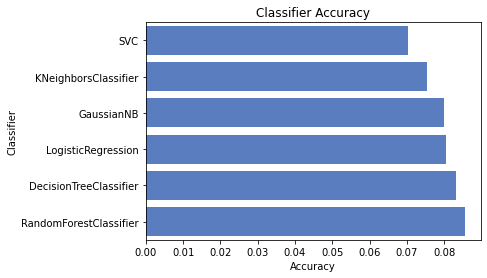

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# инициализирую все методы классификации в 1 переменную
classifiers=[KNeighborsClassifier(5),
               SVC(probability=True, kernel='rbf'),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               LogisticRegression()
            ]
# создаю датафрем для логов каждого метода
log_cols=['Classifier','Accuracy']
log=pd.DataFrame(columns=log_cols)

# разделяю на тренеровачную и тест. выборку
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

acc_dict={}
# запускаю цикл для прогона и обучения каждой модели и записи ее результатов "accuracy_score" на тестовой выборке
for clf in classifiers:
#     записываю названия метода классификации
    name=clf.__class__.__name__
#     обучаю метод
    clf.fit(X_train,Y_train)
#     получаю предсказание метода
    train_predictions=clf.predict(X_test)
#     записываю результат "accuracy_score"
    acc=accuracy_score(Y_test,train_predictions)
#     проверяю есть ли результаты этого метода
    if name in acc_dict:
#         если есть то добовляю в него результат "accuracy_score" 
        acc_dict[name]+=acc
    else:
#         если нет тосоздаюновое название и записываю в него результат "accuracy_score"
        acc_dict[name]=acc



for clf in acc_dict:
#     уменьшаю размерность итога предсказания для модели
    acc_dict[clf]=acc_dict[clf]/10.0
#     создаю дата фрем с названием методов и их результатами и добавляю заголовки
    log_entry=pd.DataFrame([[clf,acc_dict[clf]]], columns=log_cols)
#     записываю в датафрейм логи каждой модели
    log=log.append(log_entry)


plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

# меняю кодировку цветов для облегчения кода
sns.set_color_codes('muted')
#  отрисовываю результаты каждой модели в одну табличку
sns.barplot(x='Accuracy', y='Classifier',data=log.sort_values(by='Accuracy'),color='b')

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Classifier f1'}, xlabel='f1', ylabel='Classifier'>

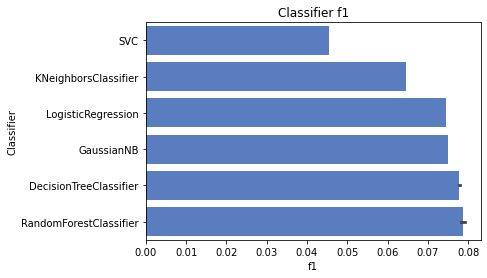

In [125]:
acc_dict={}
# запускаю цикл для прогона и обучения каждой модели и записи ее результатов "accuracy_score" на тестовой выборке
for clf in classifiers:
#     записываю названия метода классификации
    name=clf.__class__.__name__
#     обучаю метод
    clf.fit(X_train,Y_train)
#     получаю предсказание метода
    train_predictions=clf.predict(X_test)
#     записываю результат "accuracy_score"
    acc=f1_score(Y_test,train_predictions)
#     проверяю есть ли результаты этого метода
    if name in acc_dict:
#         если есть то добовляю в него результат "accuracy_score" 
        acc_dict[name]+=acc
    else:
#         если нет тосоздаюновое название и записываю в него результат "accuracy_score"
        acc_dict[name]=acc



for clf in acc_dict:
#     уменьшаю размерность итога предсказания для модели
    acc_dict[clf]=acc_dict[clf]/10.0
#     создаю дата фрем с названием методов и их результатами и добавляю заголовки
    log_entry=pd.DataFrame([[clf,acc_dict[clf]]], columns=log_cols)
#     записываю в датафрейм логи каждой модели
    log=log.append(log_entry)


plt.xlabel('f1')
plt.title('Classifier f1')

# меняю кодировку цветов для облегчения кода
sns.set_color_codes('muted')
#  отрисовываю результаты каждой модели в одну табличку
sns.barplot(x='f1', y='Classifier',data=log.sort_values(by='f1'),color='b')